## patent-forward-citations-title_analysis-1A_alloys

### Load dataframe and create two new dataframes with the top 5% and top 10% of patent citations. 

In [1]:
import numpy as np
import pandas as pd

df_patents = pd.read_csv('/Users/stevehansen/Desktop/output_alloy_data_total.csv',encoding='latin1')


# Drop unwanted columns 

df_patents = df_patents.drop(['Unnamed: 0'], axis=1)
df_patents = df_patents.drop(['num_patent'], axis=1)


# Revers the order of the dataframe. 
df_patents = df_patents.iloc[::-1]

# Renumber the index so that the plots are numbered correctly. 

df_patents = df_patents.reset_index()
del df_patents['index']

print (df_patents.head(5))       # Looks okay.


  patent_no                                       url  \
0   3930575  https://www.google.com/patents/US3930575   
1   3930848  https://www.google.com/patents/US3930848   
2   3930895  https://www.google.com/patents/US3930895   
3   3930899  https://www.google.com/patents/US3930899   
4   3930904  https://www.google.com/patents/US3930904   

                                               title issue_date      date  \
0  Method for a surface treatment of an iron, fer...     1/6/76  6-Jan-76   
1          High temperature low density cobalt alloy     1/6/76  6-Jan-76   
2         Special magnesium-manganese aluminum alloy     1/6/76  6-Jan-76   
3  Method of spraying molybdenum on aluminum or a...     1/6/76  6-Jan-76   
4        Nickel-iron-chromium alloy wrought products     1/6/76  6-Jan-76   

   num_inventor  num_pc  num_npc  num_rb  num_class  num_le  
0             3       6        2       2          5       0  
1             1       1        0       0          5       0  
2       

### Save as df_patents.

In [2]:
df_patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 11 columns):
patent_no       10137 non-null object
url             10137 non-null object
title           10137 non-null object
issue_date      10137 non-null object
date            10137 non-null object
num_inventor    10137 non-null int64
num_pc          10137 non-null int64
num_npc         10137 non-null int64
num_rb          10137 non-null int64
num_class       10137 non-null int64
num_le          10137 non-null int64
dtypes: int64(6), object(5)
memory usage: 871.2+ KB


In [65]:
df_patents = df_patents.sort_values(by=['num_rb'], ascending=[False])
print (df_patents.head(10))

     patent_no                                       url  \
1921   4665906  https://www.google.com/patents/US4665906   
3487   5190546  https://www.google.com/patents/US5190546   
4518   5597378  https://www.google.com/patents/US5597378   
2932   4984581  https://www.google.com/patents/US4984581   
3160   5067957  https://www.google.com/patents/US5067957   
2567   4864824  https://www.google.com/patents/US4864824   
3136   5061914  https://www.google.com/patents/US5061914   
5070   5888201  https://www.google.com/patents/US5888201   
4413   5545210  https://www.google.com/patents/US5545210   
5564   6139510  https://www.google.com/patents/US6139510   

                                                  title issue_date       date  \
1921   Medical devices incorporating sim alloy elements    5/19/87  19-May-87   
3487   Medical devices incorporating SIM alloy elements     3/2/93   2-Mar-93   
4518   Medical devices incorporating SIM alloy elements    1/28/97  28-Jan-97   
2932   Flexible

### df_pat05 is the top 5% of cited patents. 

In [4]:
df_pat05 = df_patents[df_patents.num_rb > df_patents.num_rb.quantile(.95)]
print (df_pat05.head(10))


     patent_no                                       url  \
1921   4665906  https://www.google.com/patents/US4665906   
3487   5190546  https://www.google.com/patents/US5190546   
4518   5597378  https://www.google.com/patents/US5597378   
2932   4984581  https://www.google.com/patents/US4984581   
3160   5067957  https://www.google.com/patents/US5067957   
2567   4864824  https://www.google.com/patents/US4864824   
3136   5061914  https://www.google.com/patents/US5061914   
5070   5888201  https://www.google.com/patents/US5888201   
4413   5545210  https://www.google.com/patents/US5545210   
5564   6139510  https://www.google.com/patents/US6139510   

                                                  title issue_date       date  \
1921   Medical devices incorporating sim alloy elements    5/19/87  19-May-87   
3487   Medical devices incorporating SIM alloy elements     3/2/93   2-Mar-93   
4518   Medical devices incorporating SIM alloy elements    1/28/97  28-Jan-97   
2932   Flexible

### df_pat10 is the top 10% of cited patents.

In [5]:
df_pat10 = df_patents[df_patents.num_rb > df_patents.num_rb.quantile(.90)]
print (df_pat10.tail(10))

     patent_no                                       url  \
1630   4560625  https://www.google.com/patents/US4560625   
5516   6117204  https://www.google.com/patents/US6117204   
2807   4943412  https://www.google.com/patents/US4943412   
44     3948688  https://www.google.com/patents/US3948688   
3557   5219678  https://www.google.com/patents/US5219678   
945    4302256  https://www.google.com/patents/US4302256   
2831   4952236  https://www.google.com/patents/US4952236   
341    4070507  https://www.google.com/patents/US4070507   
1651   4566177  https://www.google.com/patents/US4566177   
5106   5902943  https://www.google.com/patents/US5902943   

                                                  title issue_date       date  \
1630  Aluminum alloy composite materials for brazed ...   12/24/85  24-Dec-85   
5516  Sintered titanium alloy material and process f...    9/12/00  12-Sep-00   
2807       High strength alpha-beta titanium-base alloy    7/24/90  24-Jul-90   
44             

In [53]:
len (df_pat05)

502

### Do short EDA on highly cited patents. 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


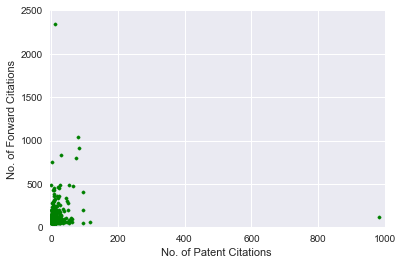

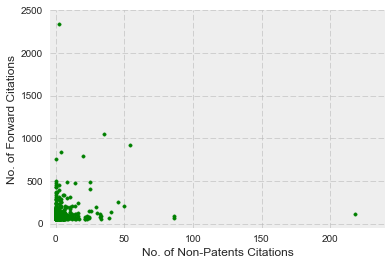

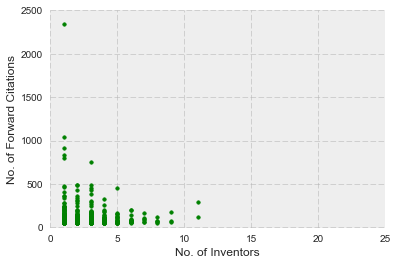

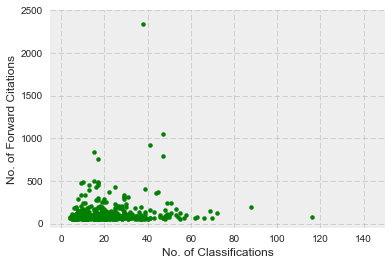

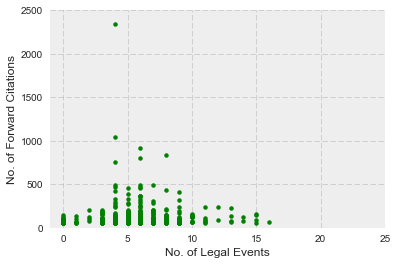

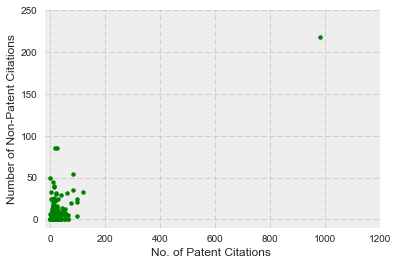

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

num_inventors = []
num_pcs = []
num_npcs = []
num_rbs = []
num_classes = []
num_les = []

# Number of patent citations, num_pc. 
value  = (df_pat05['num_pc'])
num_pcs.append(value)  
    
# Number of forward citations, num_rb.
value  = (df_pat05['num_rb'])
num_rbs.append(value)

# Number of inventors, num_inventor.
value  = (df_pat05['num_inventor'])
num_inventors.append(value)

# Number of non-patent citations, num_npc.
value  = (df_pat05['num_npc'])
num_npcs.append(value)

# Number of legal events, num_le.
value  = (df_pat05['num_le'])
num_les.append(value)

# Number of classifications, num_class
value  = (df_pat05['num_class'])
num_classes.append(value)

# Plots 

# No. of forward patent citations vs. No. of back patent references. 

plt.scatter(num_pcs, num_rbs, marker = 'o', color = 'green', s = 11 )
plt.xlabel("No. of Patent Citations ")
plt.ylabel("No. of Forward Citations")
plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-2,1000), ylim = (-5,2500))
plt.savefig('rbs-vw-pcs.png',dpi=600)

plt.show()


# Number of forward citations vs. number of (back) non-patent citations. 

plt.scatter(num_npcs, num_rbs,  marker = 'o', color = 'green', s = 11)
plt.xlabel("No. of Non-Patents Citations")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-4,240), ylim = (-50,2500))
plt.savefig('rbs-vs-npcs.png',dpi=800)
plt.show()


# Number of inventors vs. number of forward citations. 

plt.scatter(num_inventors, num_rbs,  marker = 'o', color = 'green', s = 13 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(0,25), ylim = (-5,2500))
plt.savefig('rbs-vs-inventors.png',dpi=600)

plt.show()


# Plot the number forward references vs. number of classifications. 

plt.scatter(num_classes, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Classifications")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-5,150), ylim = (-50,2500))
plt.savefig('rbs-vs-classes.png',dpi=600)
plt.show()


# Plot the number of forward citations vs. number of legal events.  

plt.scatter(num_les, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Forward Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,2500))
plt.savefig('rbs-vs-legal_events.png',dpi=600)
plt.show()


# Plot the number of Patent Citation versus Non-Patent Citations. 

plt.scatter(num_pcs, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Citations ")
plt.ylabel("Number of Non-Patent Citations")

plt.style.use('bmh')
ax = plt.axes()
ax.set(xlim=(-20,1200), ylim = (-10,250))

plt.show()


### Check correlation matrix of highly cited patents.

In [8]:
df_pat05.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
num_inventor,1.000000,0.022383,0.050729,-0.108912,0.036941,-0.029828
num_pc,0.022383,1.000000,0.769702,0.081991,0.070929,-0.008262
num_npc,0.050729,0.769702,1.000000,0.104706,0.097511,-0.011268
num_rb,-0.108912,0.081991,0.104706,1.000000,0.110091,0.047018
num_class,0.036941,0.070929,0.097511,0.110091,1.000000,0.012637
num_le,-0.029828,-0.008262,-0.011268,0.047018,0.012637,1.000000


In [9]:
df_pat10.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
num_inventor,1.000000,0.032197,0.056563,-0.077596,0.032142,0.021648
num_pc,0.032197,1.000000,0.728256,0.093338,0.086983,0.016997
num_npc,0.056563,0.728256,1.000000,0.123210,0.101443,0.033708
num_rb,-0.077596,0.093338,0.123210,1.000000,0.127755,0.052303
num_class,0.032142,0.086983,0.101443,0.127755,1.000000,0.012278
num_le,0.021648,0.016997,0.033708,0.052303,0.012278,1.000000


In [10]:
df_pat15 = df_patents[df_patents.num_rb > df_patents.num_rb.quantile(.85)]
df_pat15.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
num_inventor,1.000000,0.027378,0.028617,-0.065869,0.053925,0.030852
num_pc,0.027378,1.000000,0.650254,0.098949,0.091335,0.038147
num_npc,0.028617,0.650254,1.000000,0.110863,0.091853,0.038607
num_rb,-0.065869,0.098949,0.110863,1.000000,0.130650,0.050232
num_class,0.053925,0.091335,0.091853,0.130650,1.000000,0.023507
num_le,0.030852,0.038147,0.038607,0.050232,0.023507,1.000000


In [11]:
df_pat05.describe()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,2.719124,14.796813,4.374502,117.750996,21.025896,5.378486
std,1.685559,45.517062,13.067733,146.806646,13.259927,2.645407
min,1.000000,0.000000,0.000000,54.000000,4.000000,0.000000
25%,1.000000,5.000000,0.000000,63.000000,12.000000,4.000000
50%,2.000000,9.000000,0.000000,78.000000,18.000000,5.000000
75%,3.000000,15.000000,4.000000,114.000000,26.000000,7.000000
max,11.000000,981.000000,218.000000,2341.000000,116.000000,16.000000


### Begin natural language processing on titles. 

In [12]:
df_titles = df_pat05['title']
print (df_titles.head(15))

1921     Medical devices incorporating sim alloy elements
3487     Medical devices incorporating SIM alloy elements
4518     Medical devices incorporating SIM alloy elements
2932     Flexible guide having two-way shape memory alloy
3160    Method of inserting medical devices incorporat...
2567    Thin film shape memory alloy and method for pr...
3136                    Shape-memory alloy micro-actuator
5070                  Titanium alloy self-expanding stent
4413    Method of implanting a permanent shape memory ...
5564                        Super elastic alloy guidewire
5076    Cobalt-chromium-molybdenum alloy stent and ste...
2773    Apparatus for bending an insertion section of ...
3167    Catheter guidewire with pseudo elastic shape m...
4457             Two way shape memory alloy medical stent
2652    Method of fabricating n-type and p-type microc...
Name: title, dtype: object


### Transform titles in dataframe into a list, call the list 'document1'.

In [14]:
# document1 is a list of the title words in df_pat05

title_word = [words for segments in df_pat05['title'] for words in segments.split()]
document1 = [element.lower() for element in title_word]
print (document1)

[u'medical', u'devices', u'incorporating', u'sim', u'alloy', u'elements', u'medical', u'devices', u'incorporating', u'sim', u'alloy', u'elements', u'medical', u'devices', u'incorporating', u'sim', u'alloy', u'elements', u'flexible', u'guide', u'having', u'two-way', u'shape', u'memory', u'alloy', u'method', u'of', u'inserting', u'medical', u'devices', u'incorporating', u'sim', u'alloy', u'elements', u'thin', u'film', u'shape', u'memory', u'alloy', u'and', u'method', u'for', u'producing', u'shape-memory', u'alloy', u'micro-actuator', u'titanium', u'alloy', u'self-expanding', u'stent', u'method', u'of', u'implanting', u'a', u'permanent', u'shape', u'memory', u'alloy', u'stent', u'super', u'elastic', u'alloy', u'guidewire', u'cobalt-chromium-molybdenum', u'alloy', u'stent', u'and', u'stent-graft', u'apparatus', u'for', u'bending', u'an', u'insertion', u'section', u'of', u'an', u'endoscope', u'using', u'a', u'shape', u'memory', u'alloy', u'catheter', u'guidewire', u'with', u'pseudo', u'elas

### Calculating tf_idf by Mark Needham.  
http://www.markhneedham.com/blog/2015/02/15/pythonscikit-learn-calculating-tfidf-on-how-i-met-your-mother-transcripts

Python’s scikit-learn library gives you two ways to generate the TF/IDF representation:

Generate a matrix of token/phrase counts from a collection of text documents using CountVectorizer and feed it to TfidfTransformer to generate the TF/IDF representation.
Feed the collection of text documents directly to TfidfVectorizer and go straight to the TF/IDF representation skipping the middle man.

I started out using the first approach and hadn’t quite got it working when I realised there was a much easier way!

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0, stop_words = 'english')

tfidf_matrix =  tf.fit_transform(document1)
feature_names = tf.get_feature_names() 
len(feature_names)


1206

In [16]:
print (feature_names)

[u'10', u'20', u'625', u'6xxx', u'7000', u'80', u'80 20', u'a1', u'a1 n1', u'abrasive', u'absorbing', u'absorption', u'acid', u'acid electrolyte', u'acids', u'activated', u'activator', u'active', u'activity', u'actuated', u'actuation', u'actuator', u'actuators', u'adaptive', u'adhesion', u'adjusting', u'aerosol', u'ag', u'aging', u'air', u'aircraft', u'al', u'al li', u'al zn', u'al zn mg', u'alcohols', u'aligned', u'alkali', u'alkaline', u'alloy', u'alloy supported', u'alloys', u'alsb', u'alsb alloy', u'alternating', u'alumina', u'alumina zirconia', u'aluminium', u'aluminium magnesium', u'aluminum', u'aluminum alloy', u'aluminum based', u'aluminum copper', u'aluminum copper magnesium', u'aluminum lithium', u'aluminum magnesium', u'aluminum palladium', u'aluminum pvd', u'aluminum silicon', u'aluminum zinc', u'aluminum zinc magnesium', u'alznmgcu', u'ambient', u'ammonium', u'amorphous', u'aneurism', u'angioplasty', u'angle', u'anhydrides', u'anisotropic', u'annealing', u'annuloplasty', u

In [17]:
tfidf_matrix

<5024x1206 sparse matrix of type '<type 'numpy.float64'>'
	with 4348 stored elements in Compressed Sparse Row format>

In [18]:
dense = tfidf_matrix.todense()
len(dense[0].tolist()[0])

1206

In [19]:
episode = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(episode)), episode) if pair[1] > 0]
 
len(phrase_scores)

1

In [20]:
sorted(phrase_scores, key=lambda t: t[1] * -1)[:5]

[(634, 1.0)]

In [21]:
feature_names[634]

u'medical'

### Count vectorizer and tf_df with:  Ultraviolet Analytics    --- use top 5% of patents 

#### http://www.ultravioletanalytics.com/2016/11/18/tf-idf-basics-with-pandas-scikit-learn/

In [22]:
# Starting with the CountVectorizer/TfidfTransformer approach...

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
# Calculate all the n-grams found in all documents

from itertools import islice
cvec.fit(df_pat05['title'])
list(islice(cvec.vocabulary_.items(), 50))


[(u'matrix structure', 1874),
 (u'limited', 1736),
 (u'method producing', 2007),
 (u'layer block', 1687),
 (u'gate mosfet', 1393),
 (u'blades titanium', 529),
 (u'magnetic', 1789),
 (u'transducer carried', 3097),
 (u'implants', 1561),
 (u'powders', 2362),
 (u'extended molybdenum', 1236),
 (u'valve shape', 3217),
 (u'growth nanotubes', 1427),
 (u'device using', 1005),
 (u'sputtered', 2841),
 (u'material comprising', 1846),
 (u'alloy method', 210),
 (u'matrix microcomposite', 1872),
 (u'having matrix', 1463),
 (u'minimize electromigration', 2047),
 (u'microetching', 2036),
 (u'process powder', 2426),
 (u'alloy internal', 192),
 (u'nickel iron', 2145),
 (u'sputter', 2838),
 (u'protective layer', 2504),
 (u'alternating', 304),
 (u'alloy blade', 101),
 (u'having specific', 1471),
 (u'shielding', 2735),
 (u'electroless plating', 1133),
 (u'method heat', 1991),
 (u'titanium diboride', 3074),
 (u'amorphous', 340),
 (u'method formation', 1989),
 (u'devices utilizing', 1014),
 (u'molybdenum base

In [24]:
# Check how many 2_grams are in the list above. 

len(cvec.vocabulary_)

3315

In [25]:
# A separate column for each term containing the count within each document. 

cvec_counts = cvec.transform(df_pat05['title'])
print 'sparse matrix shape:', cvec_counts.shape
print 'nonzero count:', cvec_counts.nnz
print 'sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1]))

sparse matrix shape: (502, 3315)
nonzero count: 6920
sparsity: 0.42%


In [61]:
# Find the most common words.  

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(50)

,occurrences,term
1969,131,method
1922,100,memory
2714,97,shape
1923,94,memory alloy
2716,94,shape memory
313,80,aluminum
1931,76,metal
1501,59,high
315,53,aluminum alloy
2406,49,process


In [27]:
# Use tf_idf to calcualte the weights of each term in each document. 

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<502x3315 sparse matrix of type '<type 'numpy.float64'>'
	with 6920 stored elements in Compressed Sparse Row format>

In [62]:
# The top 20 terms by average tf-idf weight.

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(50)

,term,weight
1922,memory,0.031973
1923,memory alloy,0.031290
2714,shape,0.031249
2716,shape memory,0.030839
1969,method,0.030313
313,aluminum,0.025008
1931,metal,0.020859
315,aluminum alloy,0.019193
1501,high,0.018586
3068,titanium,0.017728


In [ ]:
# In a future post, we’ll take a look at how to take this tf-idf weight matrix and feed it into a predictive model.

### More natural language processing. 

In [60]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

#   http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html
#   + #sphx-glr-auto-examples-applications-topics-extraction-with-nmf-lda-py

# NMF is Non-negative Matrix Factorization 
# data is "document1"

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 100
n_features = 30
n_topics = 20
n_top_words = 8


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(document1)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(document1)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=0.1, l1_ratio=0.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=15,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Extracting tf-idf features for NMF...
done in 0.054s.
Extracting tf features for LDA...
done in 0.057s.
Fitting the NMF model with tf-idf features, n_samples=100 and n_features=30...
done in 0.599s.

Topics in NMF model:
Topic #0:
alloy using titanium aluminum amorphous apparatus based containing
Topic #1:
method using low alloy aluminum amorphous apparatus based
Topic #2:
memory using low alloy aluminum amorphous apparatus based
Topic #3:
shape using low alloy aluminum amorphous apparatus based
Topic #4:
aluminum based silicon using low alloy amorphous apparatus
Topic #5:
metal nickel using low alloy aluminum amorphous apparatus
Topic #6:
high using titanium alloy aluminum amorphous apparatus based
Topic #7:
process using low alloy aluminum amorphous apparatus based
Topic #8:
having using titanium alloy aluminum amorphous apparatus based
Topic #9:
titanium nickel based using low alloy aluminum amorphous
Topic #10:
layer using titanium alloy aluminum amorphous apparatus based
Topic #11

In [30]:
len(data_samples)

500

In [31]:
len (document1)

5024

In [56]:
dense = tfidf_matrix.todense()
len(dense[0].tolist()[0])

1206

In [55]:
print (dense) 

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
